In [2]:
import gwsurrogate
import numpy as np
import matplotlib.pyplot as plt
import bilby
from gwpy.timeseries import TimeSeries

lal.G_SI != G
lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


/Users/zohaggard/anaconda2/envs/igwn-py37/lib/python3.7/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/Users/zohaggard/anaconda2/envs/igwn-py37/lib/python3.7/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


In [3]:
def sigmoid(x,x0,L,k):
    
    sig = []
    
    for item in x:
        value=L/(1+np.exp(-k*(item-x0)))
        sig.append(value)
    return sig

In [4]:
def create_bru_values(m_odd, em, M, a, n_ref):
    
    """ 
    m_odd is odd integer, g_s is string coupling (GR == 1), em is 2,
    M is total mass, a is dimensionless spin, and amplitude_qnm is 
    the amplitude of the mode of interest 
    
    returns amplitude (quantum), omega_real, tau, and tp
    
    """
    
    g_s = 1/n_ref
    c = 3e8
    G = 6.67e-11
    Msun = 1.989e30
    
    conversion_w = (c**3)/(G * M * Msun)
    R_con = (2 * G * M * Msun) / (c**2)
    
    r_s = (R_con + np.sqrt((R_con**2) - 4*(a**2)))/2 #units m
    omega_real = (m_odd * np.pi /(2 * r_s * n_ref)) * c   #units 1/m --> 1/s
    omega_im = - (1/r_s) * (1/(n_ref**2)) * c
    
    tau = 1/omega_im
    tp = 1/omega_real 
    
    print("Q freq is {}".format(omega_real/(2*np.pi)))
    print("Q tau is {}".format(tau))
    
    return {'omega_real_Q': omega_real, 'omega_img_Q': omega_im,
            'tau_Q': tau, 'tp_Q': tp, 'freq_Q': (omega_real/(2*np.pi)),
           'rs_Q': r_s}

In [5]:
def bru_sine(time, amplitude, tau, tp, omega_real, phase, **kwargs):
    
    """
    returns damped complex sine as h (type=array) 
    assumes that tau is negative number

    """
    
    
    h = np.zeros(len(time), dtype=np.complex128)
    tidx = time >= tp
    
    damp_arg = (time[tidx])/tau
    sin_arg = (omega_real * (time[tidx])) - phase
    h[tidx] = amplitude*np.exp(damp_arg) * np.exp((1j*sin_arg)) 
   
    return h

In [6]:
sur=gwsurrogate.LoadSurrogate('NRSur7dq4')

/Users/zohaggard/anaconda2/envs/igwn-py37/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:245: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.t = h5file['t_ds'].value
/Users/zohaggard/anaconda2/envs/igwn-py37/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:272: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'coefs': group['%s_coefs'%(key)].value,
/Users/zohaggard/anaconda2/envs/igwn-py37/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:273: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'bfOrders': group['%s_bfOrders'%(key)].value
/Users/zohaggard/anaconda2/envs/igwn-py37/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:282: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'coefs': group['%s_%d_coefs'%(key, i)].value,
/Users/zohaggard/anaconda2/envs/igw

Loaded NRSur7dq4 model


In [60]:
q = 1
chiA = [0,0,0]
chiB = [0,0,0]      # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 0         # initial frequency, f_low=0 returns the full surrogate
M = 40   # Total masss in solar masses
dist_mpc = 235     # distance in megaparsecs
dt = 1./4096       # step size in seconds
ellMax = 4     # Highest l index for modes to use
inclination = 0

# dyn stands for dynamics, do dyn.keys() to see contents
t, h, dyn = sur(q, chiA, chiB, times=times, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, units='mks',
               inclination=inclination)

NameError: name 'times' is not defined

In [52]:
tnew, hnew, dyn = sur(q, chiA, chiB, times=time, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, units='mks',
               inclination=inclination)

Exception: times were given as input but returned domain somehow does not match.

In [9]:
bru_values=create_bru_values(1, 0, 40, 0, 5)

Q freq is 127.19884401690555
Q tau is -0.009827133333333331


/Users/zohaggard/anaconda2/envs/igwn-py37/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/zohaggard/anaconda2/envs/igwn-py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


Text(0.5, 1.0, 'n=3,M=40,inc=0,chi=0,dist=235 Mpc')

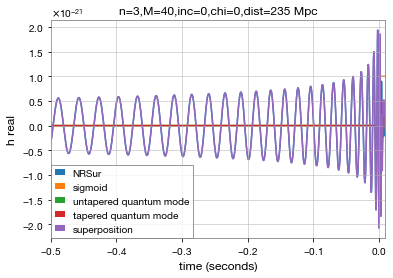

In [61]:
plt.plot(t,h,label='NRSur')
plt.plot(t,sigmoid(x=t,x0=bru_values['tp_Q'],L=1e-21,k=4096), label='sigmoid')
plt.plot(t,bru_sine(time=t, amplitude=1e-21, tau=bru_values['tau_Q'], tp=bru_values['tp_Q'], 
                    omega_real=bru_values['omega_real_Q'], phase=0).real, label='untapered quantum mode')
bru=bru_sine(time=t, amplitude=1e-21, tau=bru_values['tau_Q'], tp=bru_values['tp_Q'], omega_real=bru_values['omega_real_Q'], phase=0)
sig=sigmoid(x=t,x0=bru_values['tp_Q']*2,L=1e-21,k=4096)
plt.plot(t, bru.real*sig/1e-21,label='tapered quantum mode')
plt.plot(t,bru.real*sig/1e-21+h, label='superposition')
plt.xlim(-0.5,0.01)
plt.legend(loc=[0,0])
plt.ylabel('h real')
plt.xlabel('time (seconds)')
plt.title('n=3,M=40,inc=0,chi=0,dist=235 Mpc')

In [45]:
sig=sigmoid(x=t,x0=bru_values['tp_Q'],L=9e-20,k=4096)
bru=bru_sine(time=t, amplitude=9e-20, tau=bru_values['tau_Q'], tp=bru_values['tp_Q'], 
                    omega_real=bru_values['omega_real_Q'], phase=0)
htotal=(bru.real*sig/9e-20)+h.real

/Users/zohaggard/anaconda2/envs/igwn-py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


In [57]:
t[1775]

-0.41383484701786544

In [31]:
H1 = bilby.gw.detector.get_empty_interferometer('H1')

In [37]:
time_series = TimeSeries(times=t, data=htotal)

In [38]:
H1.set_strain_data_from_gwpy_timeseries(time_series=time_series,)

In [40]:
H1.plot_data()

14:35 bilby INFO    : Generating frequency domain strain from given time domain strain.
14:35 bilby INFO    : Applying a tukey window with alpha=0.4613911574206548, roll off=0.2


In [41]:
H1.set_strain_data_from_gwpy_timeseries?